# Homework

* Daniela Sayago Porras

Using Pandas and Statsmodels write a Jupyter Notebook that:

1. Uses the data from the Maddison Project to plot the evolution of total population across the world.
2. Plots the evolution of the share of the world population by countries and WB regions.
3. Downloads fertility, mortality and life expectancy data from the WB and plots its evolution in the last 60 years.
4. Downloads mortality and life expectancy data (across regions and cohorts) from the Human Mortality Database and plots its evolution.
5. Using this data analyze the convergence of life expectanty, mortality and fertility.

Submit your notebook as a pull request to the course's github repository

#### 1. Uses the data from the Maddison Project to plot the evolution of total population across the world.

In [155]:
import pandas as pd
import numpy as np
import os


In [156]:
pathout = './data/'
if not os.path.exists(pathout):
    os.mkdir(pathout)
pathgraphs = './graphs/'
if not os.path.exists(pathgraphs):
    os.mkdir(pathgraphs)
    


In [157]:
try:
    maddison_new = pd.read_stata(pathout + 'Maddison2018.dta')
    maddison_new_region = pd.read_stata(pathout + 'Maddison2018_region.dta')
    maddison_new_1990 = pd.read_stata(pathout + 'Maddison2018_1990.dta')
except:
    maddison_new = pd.read_stata('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2018.dta')
    maddison_new.to_stata(pathout + 'Maddison2018.dta', write_index=False, version=117)
    maddison_new_region = pd.read_stata('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2018_region_data.dta')
    maddison_new_region.to_stata(pathout + 'Maddison2018_region.dta', write_index=False, version=117)
    maddison_new_1990 = pd.read_stata('https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2018_1990bm.dta')
    maddison_new_1990.to_stata(pathout + 'Maddison2018_1990.dta', write_index=False, version=117)

In [161]:
pop = maddison_new_region
pop['year'] = pop.year.astype(int)
pop['population'] = pop['pop']
pop

,region,region_name,year,cgdppc,rgdpnapc,pop,population
0,af,Africa,1870,NaN,NaN,NaN,NaN
1,af,Africa,1871,NaN,NaN,NaN,NaN
2,af,Africa,1872,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
1036,wd,World,2014,14261.0,14376.0,7152269.0,7152269.0
1037,wd,World,2015,14500.0,14616.0,7231375.0,7231375.0
1038,wd,World,2016,14574.0,14692.0,7311687.0,7311687.0


In [162]:
maddison_new['year'] = maddison_new.year.astype(int)
maddison_new

,countrycode,country,year,cgdppc,rgdpnapc,pop,i_cig,i_bm
0,AFG,Afghanistan,1820,NaN,NaN,3280.0,NaN,NaN
1,AFG,Afghanistan,1870,NaN,NaN,4207.0,NaN,NaN
2,AFG,Afghanistan,1913,NaN,NaN,5730.0,NaN,NaN
...,...,...,...,...,...,...,...,...
19870,ZWE,Zimbabwe,2014,1797.0,1594.0,13772.0,Extrapolated,NaN
19871,ZWE,Zimbabwe,2015,1759.0,1560.0,14230.0,Extrapolated,NaN
19872,ZWE,Zimbabwe,2016,1729.0,1534.0,14547.0,Extrapolated,NaN


In [163]:
pop['year'] = pop.year.astype(int)
popG = pop
popG = popG.pivot_table(index='year',columns='region_name',values='population')
popG

region_name,Africa,East Asia,Eastern Europe,Latin America,Western Asia,Western Europe,Western Offshoots,World
year,,,,,,,,
1870,NaN,736845.0,NaN,39023.0,NaN,191985.0,46088.0,1013941.0
1871,NaN,NaN,NaN,NaN,NaN,192273.0,46880.0,NaN
1872,NaN,NaN,NaN,NaN,NaN,193136.0,48048.0,NaN
...,...,...,...,...,...,...,...,...
2014,1122390.0,3890745.0,408749.0,608041.0,319086.0,420202.0,383056.0,7152269.0
2015,1149696.0,3925612.0,408796.0,614085.0,324627.0,422253.0,386306.0,7231375.0
2016,1177165.0,3961483.0,409088.0,620068.0,329849.0,424304.0,389730.0,7311687.0


In [164]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()

Text(0, 0.5, 'Evolution of total population')

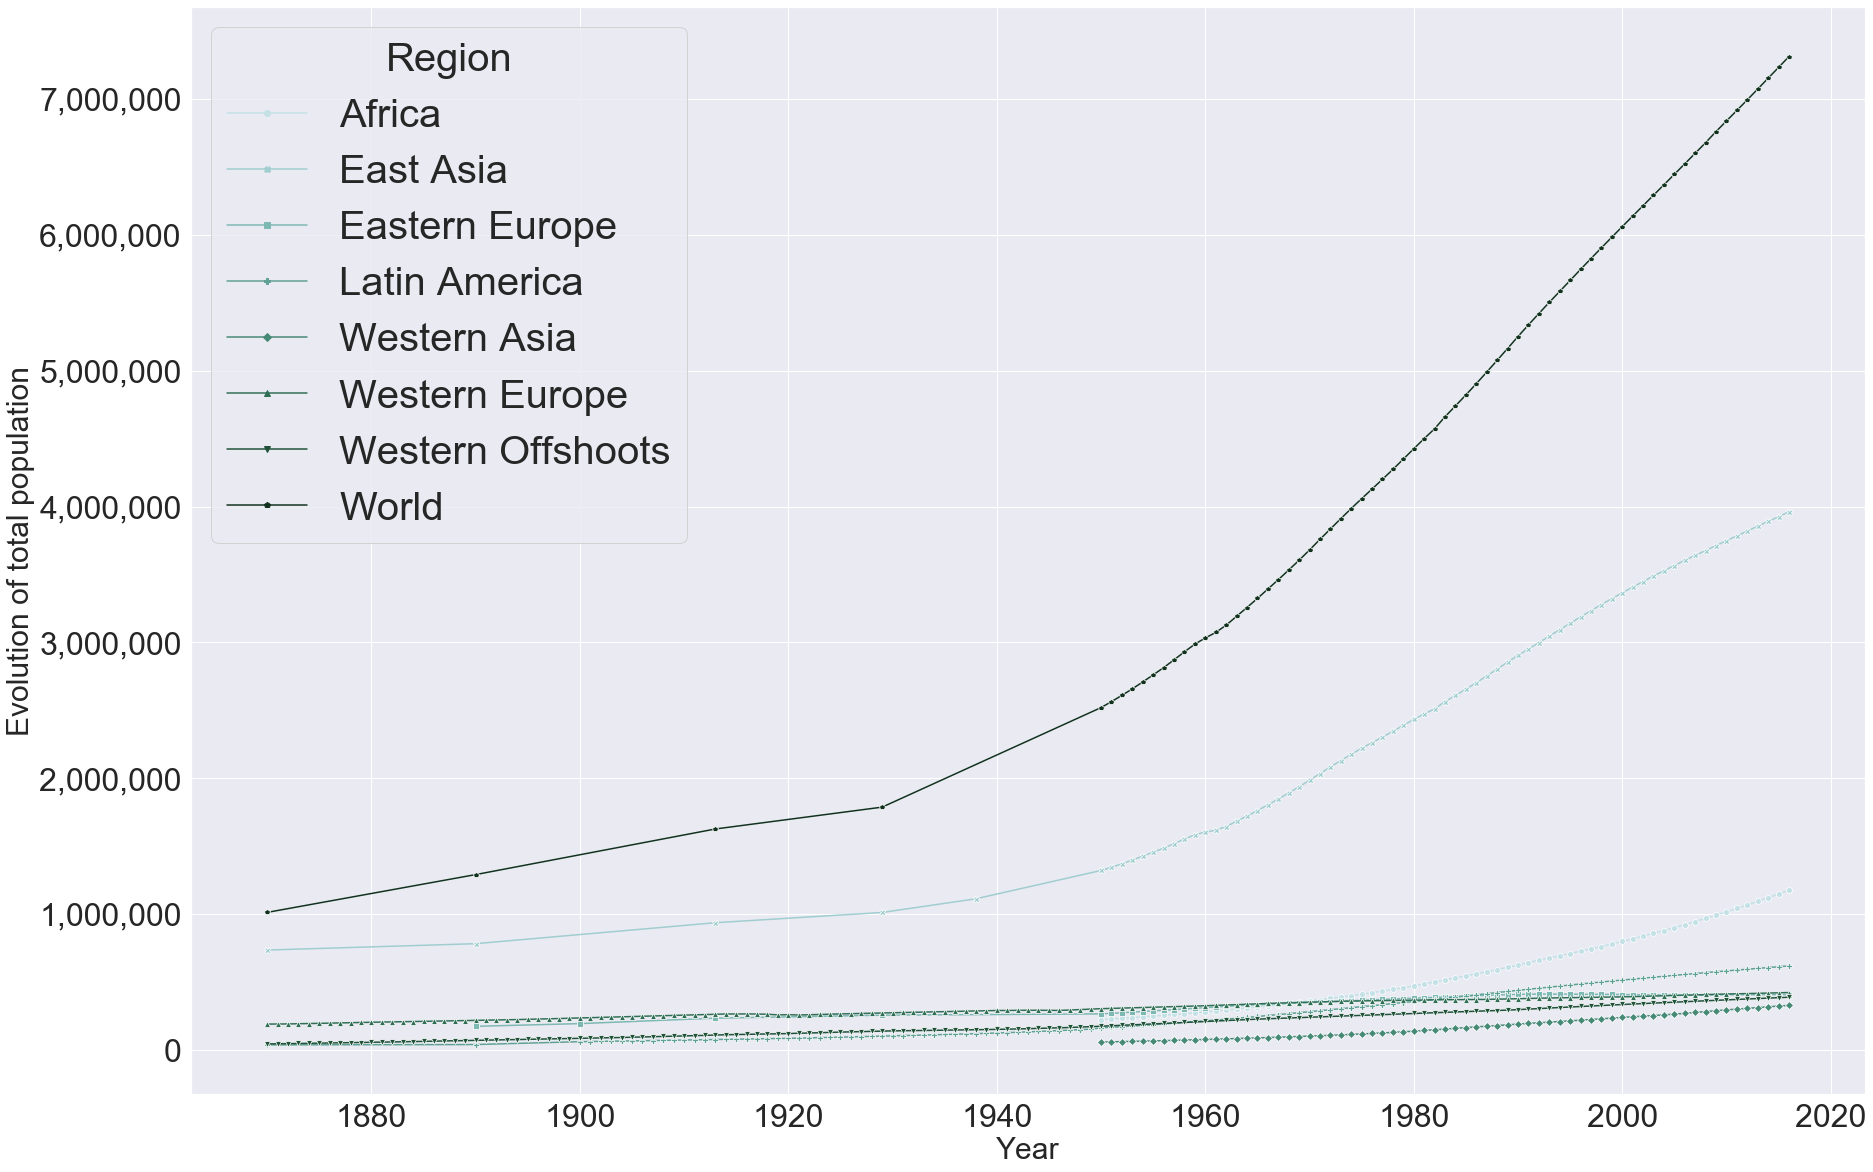

In [166]:
# Select some colors
mycolors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
# Use seaborn to setup a color map to be used by matplotlib
my_cmap = mpl.colors.ListedColormap(sns.color_palette(mycolors).as_hex())
# Set the size of the figure and get a figure and axis object
fig, ax = plt.subplots(figsize=(30,20))
# Plot using the axis ax and colormap my_cmap
sns.lineplot(data=popG , alpha=1, palette="ch:2.,.2", dashes=False, markers=True)
# Change options of axes, legend
ax.tick_params(axis = 'both', which = 'major', labelsize=32)
ax.tick_params(axis = 'both', which = 'minor', labelsize=16)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.legend(prop={'size': 40}).set_title("Region", prop = {'size':40})
# Label axes
ax.set_xlabel('Year', fontsize=30)
ax.set_ylabel('Evolution of total population', fontsize=30)


#### 2.Plots the evolution of the share of the world population by countries and WB regions.

In [17]:
import requests
import pandas as pd
import pandas_datareader as web

session = requests.Session()
session.verify = False

import ssl 

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

/Users/danielasayago/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [18]:
import pandas as pd
import world_bank_data as wb
pd.set_option('display.max_rows', 6)



In [19]:
import ssl 

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
    import urllib3,certifi
https = urllib3.PoolManager( cert_reqs='CERT_REQUIRED',
 ca_certs=certifi.where(),)  

from time import sleep
from pandas_datareader import data, wb
import wbpy 
from pprint import pprint

In [20]:
import world_bank_data as wbd
pd.set_option('display.max_rows', 6)


In [21]:
wbdcountries = wbd.get_countries()
wbdcountries['name'] = wbdcountries.name.str.strip()
wbdcountries

,iso2Code,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
id,,,,,,,,,
ABW,AW,Aruba,Latin America & Caribbean,,High income,Not classified,Oranjestad,-70.0167,12.5167
AFG,AF,Afghanistan,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.5228
AFR,A9,Africa,Aggregates,,Aggregates,Aggregates,,NaN,NaN
...,...,...,...,...,...,...,...,...,...
ZAF,ZA,South Africa,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Upper middle income,IBRD,Pretoria,28.1871,-25.7460
ZMB,ZM,Zambia,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Lower middle income,IDA,Lusaka,28.2937,-15.3982
ZWE,ZW,Zimbabwe,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Lower middle income,Blend,Harare,31.0672,-17.8312


In [22]:
wbdcountries.reset_index(level=0, inplace=True)

In [23]:
wbdcountries.rename(columns={'id':'countrycode'}, inplace=True)
wbdcountries

,countrycode,iso2Code,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
0,ABW,AW,Aruba,Latin America & Caribbean,,High income,Not classified,Oranjestad,-70.0167,12.5167
1,AFG,AF,Afghanistan,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.5228
2,AFR,A9,Africa,Aggregates,,Aggregates,Aggregates,,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
301,ZAF,ZA,South Africa,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Upper middle income,IBRD,Pretoria,28.1871,-25.7460
302,ZMB,ZM,Zambia,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Lower middle income,IDA,Lusaka,28.2937,-15.3982
303,ZWE,ZW,Zimbabwe,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Lower middle income,Blend,Harare,31.0672,-17.8312


In [24]:
popWb = pop.loc[pop.region_name=='World']
popWb = popWb.pivot_table(index='year',columns='region_name',values='pop',aggfunc='sum')
popWb

region_name,World
year,
1870,1013941.0
1890,1292040.0
1913,1627706.0
...,...
2014,7152269.0
2015,7231375.0
2016,7311687.0


In [25]:
pop_country=maddison_new.merge(popWb, on='year')

In [26]:
pop_country['share']=(pop_country['pop']/pop_country['World'])*100
pop_country

,countrycode,country,year,cgdppc,rgdpnapc,pop,i_cig,i_bm,World,share
0,AFG,Afghanistan,1870,NaN,NaN,4207.0,NaN,NaN,1013941.0,0.414916
1,ALB,Albania,1870,658.0,795.0,603.0,Extrapolated,NaN,1013941.0,0.059471
2,ARG,Argentina,1870,2514.0,2578.0,1796.0,Extrapolated,NaN,1013941.0,0.177131
...,...,...,...,...,...,...,...,...,...,...
11615,VEN,Venezuela (Bolivarian Republic of),1929,1410.0,3319.0,3259.0,Extrapolated,NaN,1788473.0,0.182222
11616,YUG,Former Yugoslavia,1929,1054.0,2427.0,14194.0,Benchmark,Historical income benchmarks,1788473.0,0.793638
11617,ZAF,South Africa,1929,3117.0,3553.0,NaN,Extrapolated,NaN,1788473.0,NaN


In [27]:
pop_country2 = pop_country.pivot_table(index='year',columns='country',values='share',aggfunc='sum')

In [28]:
pop_region = pop_country[['countrycode', 'country', 'year', 'pop',
                        'World']].merge(wbdcountries[['countrycode', 'region']], on=['countrycode'])
pop_region['share']=(pop_region['pop']/pop_region['World'])*100
pop_region2 = pop_region.pivot_table(index='year',columns='region',values='share',aggfunc='sum')

Text(0, 0.5, 'Share of world population by countries and WB regions')

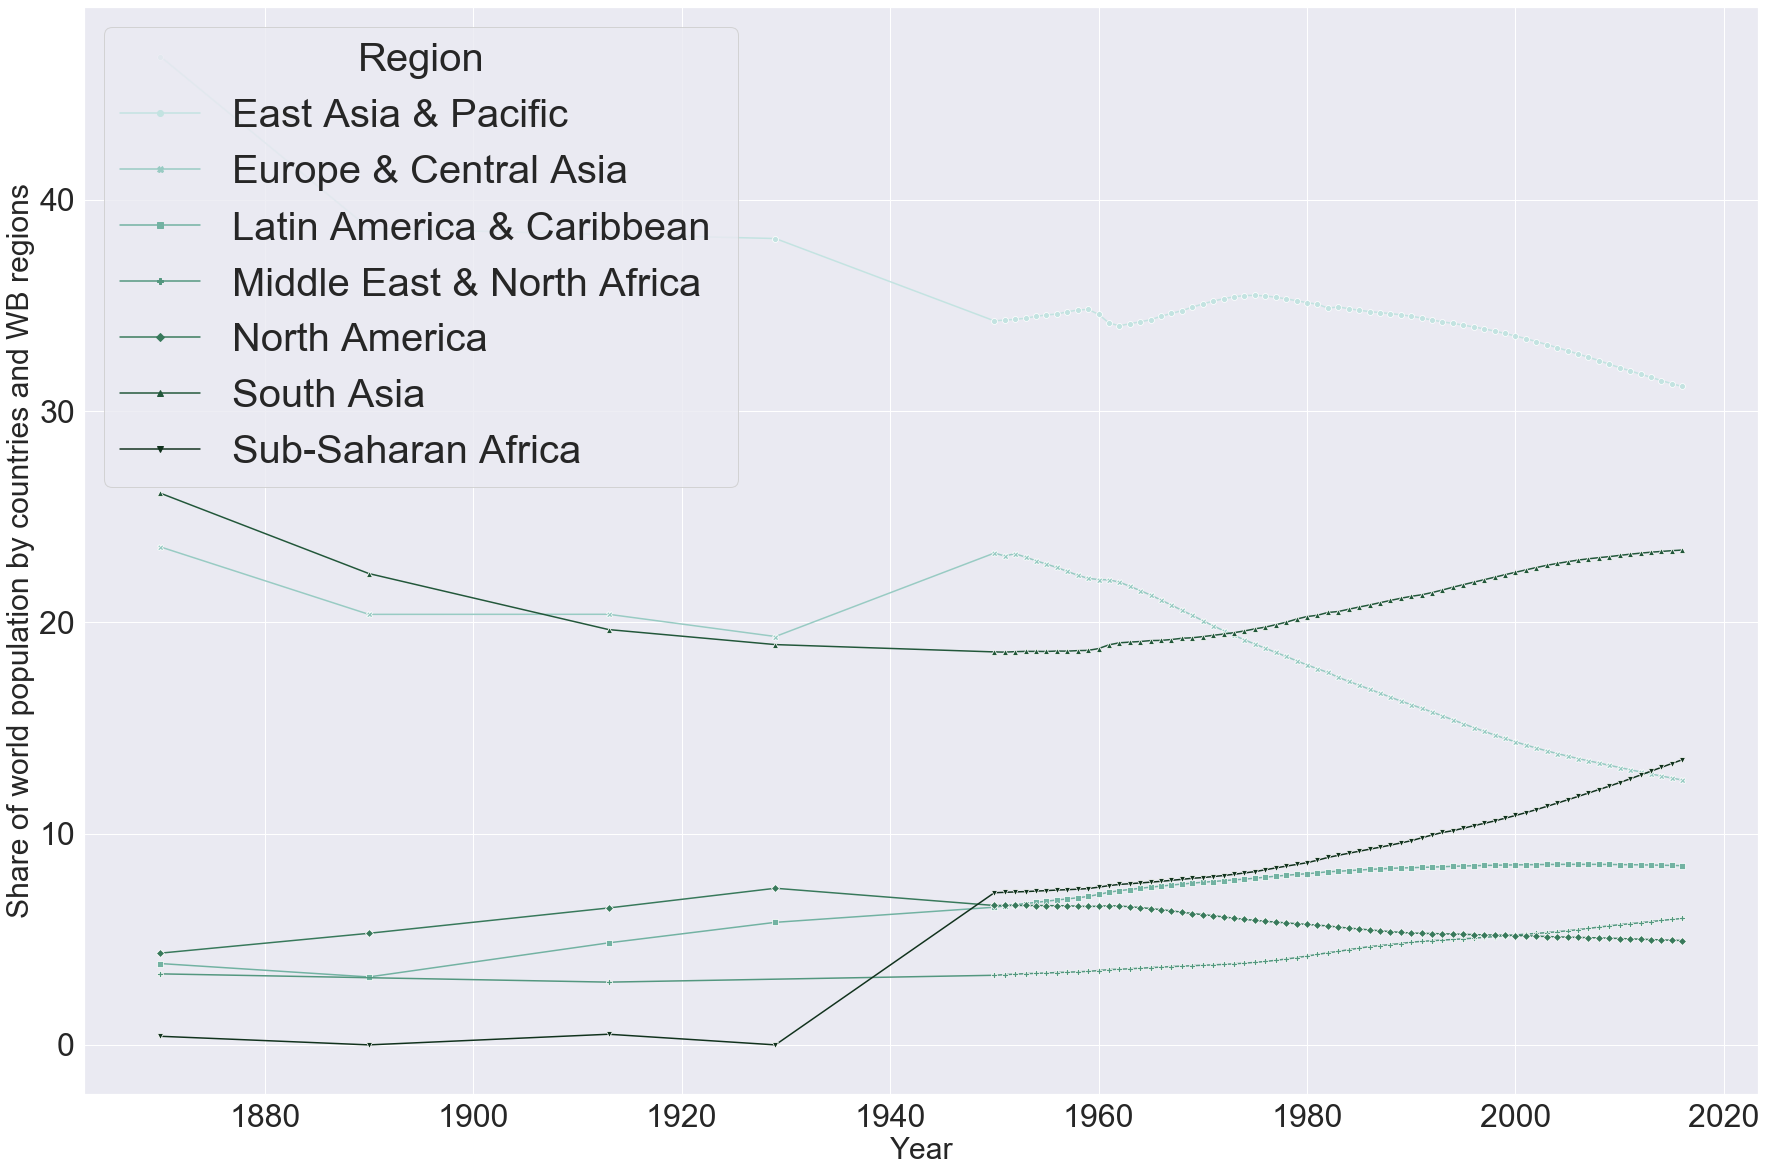

In [29]:
# Select some colors
mycolors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
# Use seaborn to setup a color map to be used by matplotlib
my_cmap = mpl.colors.ListedColormap(sns.color_palette(mycolors).as_hex())
# Set the size of the figure and get a figure and axis object
fig, ax = plt.subplots(figsize=(30,20))
# Plot using the axis ax and colormap my_cmap
sns.lineplot(data=pop_region2 , palette="ch:56.,.16", hue="event", style="event", dashes=False, markers=True)
# Change options of axes, legend
ax.tick_params(axis = 'both', which = 'major', labelsize=32)
ax.tick_params(axis = 'both', which = 'minor', labelsize=16)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.legend(prop={'size': 40}).set_title("Region", prop = {'size':40})
# Label axes
ax.set_xlabel('Year', fontsize=30)
ax.set_ylabel('Share of world population by countries and WB regions', fontsize=30)


### 3. Downloads fertility, mortality and life expectancy data from the WB and plots its evolution in the last 60 years.

In [80]:
import os

pathout = './data/'

if not os.path.exists(pathout):
    os.mkdir(pathout)
    
pathgraphs = './graphs/'
if not os.path.exists(pathgraphs):
    os.mkdir(pathgraphs)

In [81]:
import urllib

In [119]:
if not os.path.exists(pathout + 'wbFertility.xls'):
    import urllib
    dataurl = "http://api.worldbank.org/v2/en/indicator/SP.DYN.TFRT.IN?downloadformat=excel"
    urllib.request.urlretrieve(dataurl, pathout + 'wbFertility.xls')

In [120]:
fert = pd.read_excel(pathout + 'wbFertility.xls', sheet_name="Data", skiprows=3)
fert = fert.drop(['Country Code','Indicator Name','Indicator Code'], axis=1)
fert= fert[[col for col in fert.columns if str(col).startswith('2019')==False]]

In [121]:
fert=fert.T
headersfert = fert.iloc[0]
fert = pd.DataFrame(fert.values[1:], columns=headersfert)
fert['World Total Fertility']=fert[:].mean(axis=1,skipna=True)
Final_fert = fert[['World Total Fertility']]

Text(0, 0.5, 'Fertility Rate')

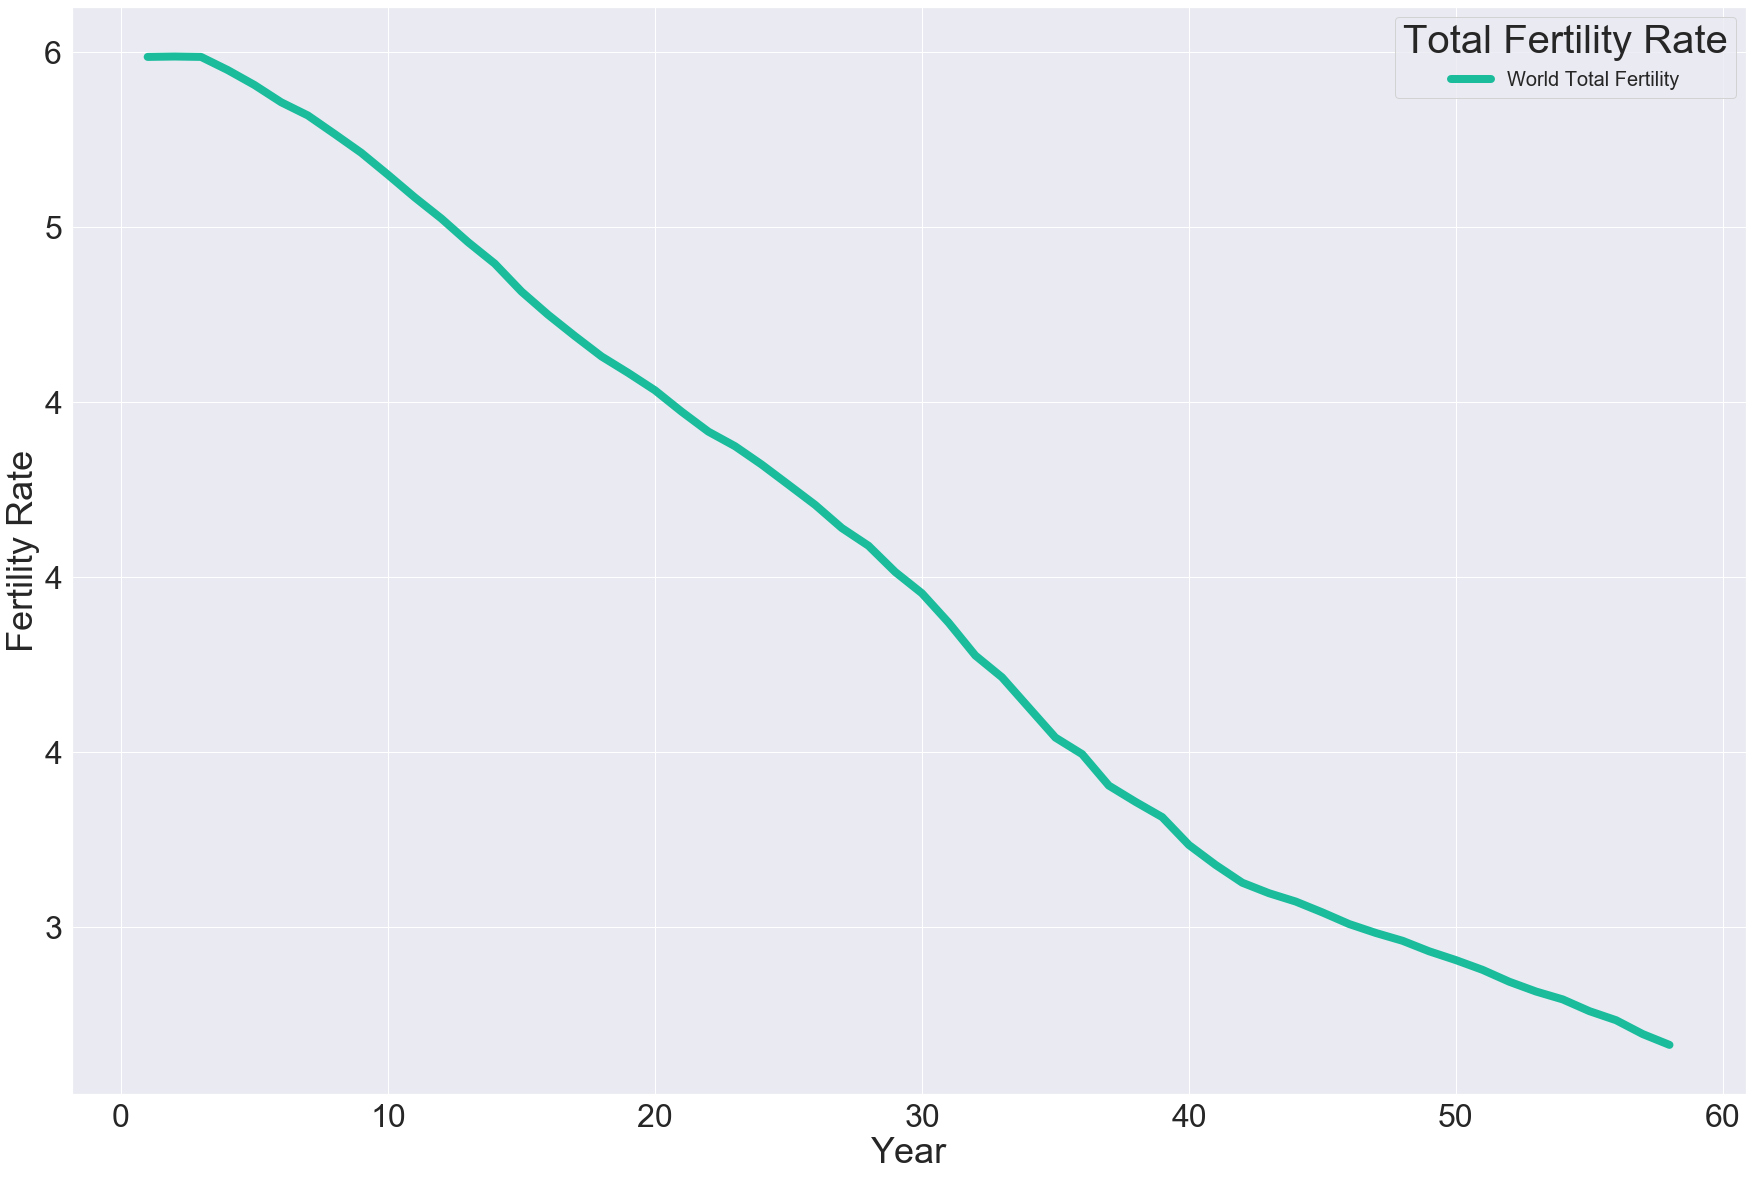

In [123]:
mycolors = ['#1abc9c', '#2ecc71', '#3498db', '#9b59b6', '#34495e', '#16a085', '#27ae60', '#2980b9', '#8e44ad', '#2c3e50', '#f1c40f', '#e67e22', '#e74c3c'] 
# Use seaborn to setup a color map to be used by matplotlib
my_cmap = mpl.colors.ListedColormap(sns.color_palette(mycolors).as_hex())
# Set the size of the figure and get a figure and axis object
fig, ax = plt.subplots(figsize=(30,20))
Final_fert.iloc[1:].plot(ax=ax, linewidth=8, cmap=my_cmap)
ax.tick_params(axis = 'both', which = 'major', labelsize=32)
ax.tick_params(axis = 'both', which = 'minor', labelsize=16)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.legend(prop={'size': 20}).set_title("Total Fertility Rate", prop = {'size':40})
ax.set_xlabel('Year', fontsize=36)
ax.set_ylabel('Fertility Rate', fontsize=36)

In [125]:
if not os.path.exists(pathout + 'wbMortality.xls'):
    import urllib
    dataurl = "http://api.worldbank.org/v2/en/indicator/SP.DYN.CDRT.IN?downloadformat=excel"
    urllib.request.urlretrieve(dataurl, pathout + 'wbMortality.xls')

In [126]:
Mor = pd.read_excel(pathout + 'Mortalitywb.xls', sheet_name="Data", skiprows=3)
Mor = Mor.drop(['Country Code','Indicator Name','Indicator Code'], axis=1)
Mor= Mor[[col for col in Mor.columns if str(col).startswith('2019')==False]]
Mor=Mor.T
headersMor = Mor.iloc[0]
Mor  = pd.DataFrame(Mor.values[1:], columns=headersMor)

In [127]:
Mor['World Total Mortaliy']=Mor[:].mean(axis=1,skipna=True)
Final_Mor = Mor[['World Total Mortaliy']]


Text(0, 0.5, 'Death Rate')

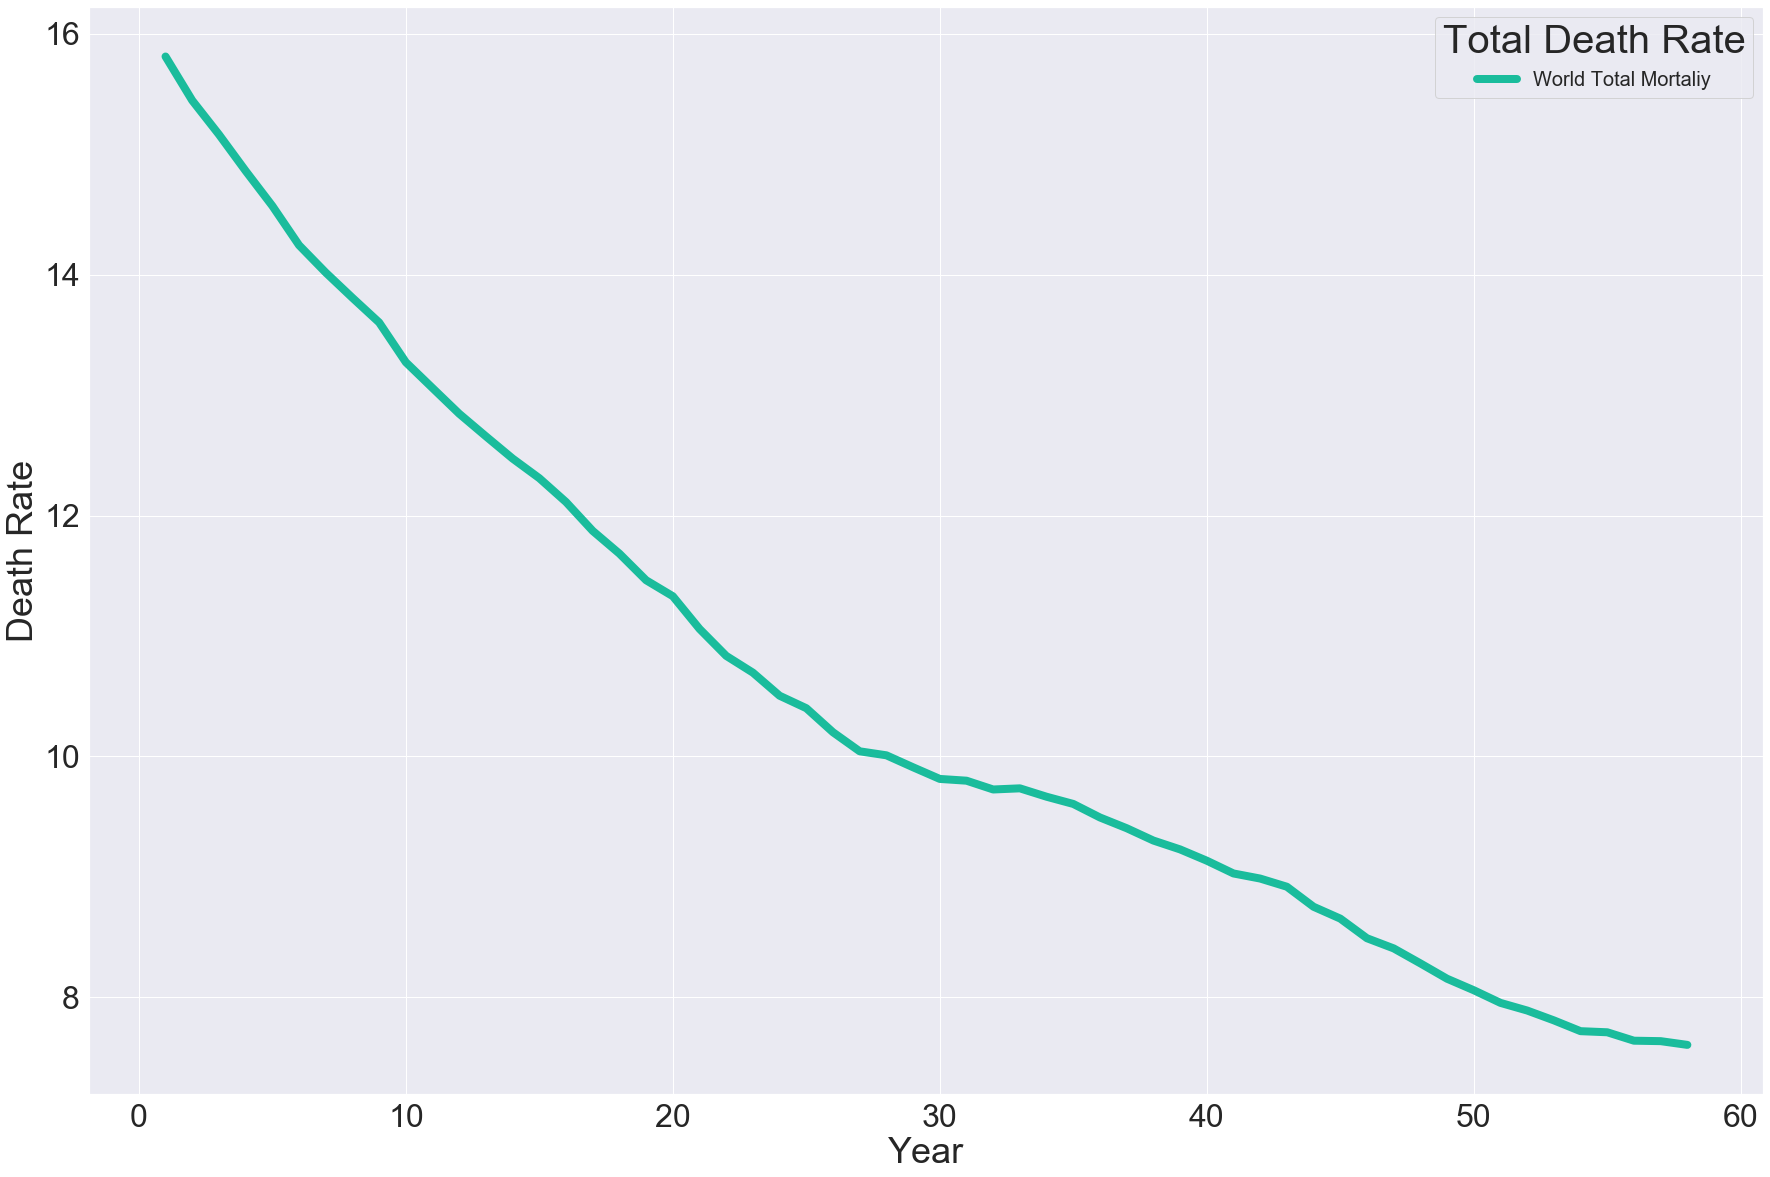

In [129]:
mycolors = ['#1abc9c', '#2ecc71', '#3498db', '#9b59b6', '#34495e', '#16a085', '#27ae60', '#2980b9', '#8e44ad', '#2c3e50', '#f1c40f', '#e67e22', '#e74c3c'] 
# Use seaborn to setup a color map to be used by matplotlib
my_cmap = mpl.colors.ListedColormap(sns.color_palette(mycolors).as_hex())
# Set the size of the figure and get a figure and axis object
fig, ax = plt.subplots(figsize=(30,20))
Final_Mor.iloc[1:].plot(ax=ax, linewidth=8, cmap=my_cmap)
ax.tick_params(axis = 'both', which = 'major', labelsize=32)
ax.tick_params(axis = 'both', which = 'minor', labelsize=16)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.legend(prop={'size': 20}).set_title("Total Death Rate", prop = {'size':40})
ax.set_xlabel('Year', fontsize=36)
ax.set_ylabel('Death Rate', fontsize=36)

In [95]:
if not os.path.exists(pathout + 'wbLife_E.xls'):
    import urllib
    dataurl = "http://api.worldbank.org/v2/en/indicator/SP.DYN.LE00.IN?downloadformat=excel"
    urllib.request.urlretrieve(dataurl, pathout + 'wbLife_E.xls')

In [96]:
life = pd.read_excel(pathout + 'wbLife_E.xls', sheet_name="Data", skiprows=3)
life = life.drop(['Country Code','Indicator Name','Indicator Code'], axis=1)
life= life[[col for col in life.columns if str(col).startswith('2019')==False]]
life=life.T

In [91]:
headerslife = life.iloc[0]
life  = pd.DataFrame(life.values[1:], columns=headerslife)
life['World Total Life Expectancy']=life[:].mean(axis=1,skipna=True)
Final_life = life[['World Total Life Expectancy']]


Text(0, 0.5, 'Life Expectancy')

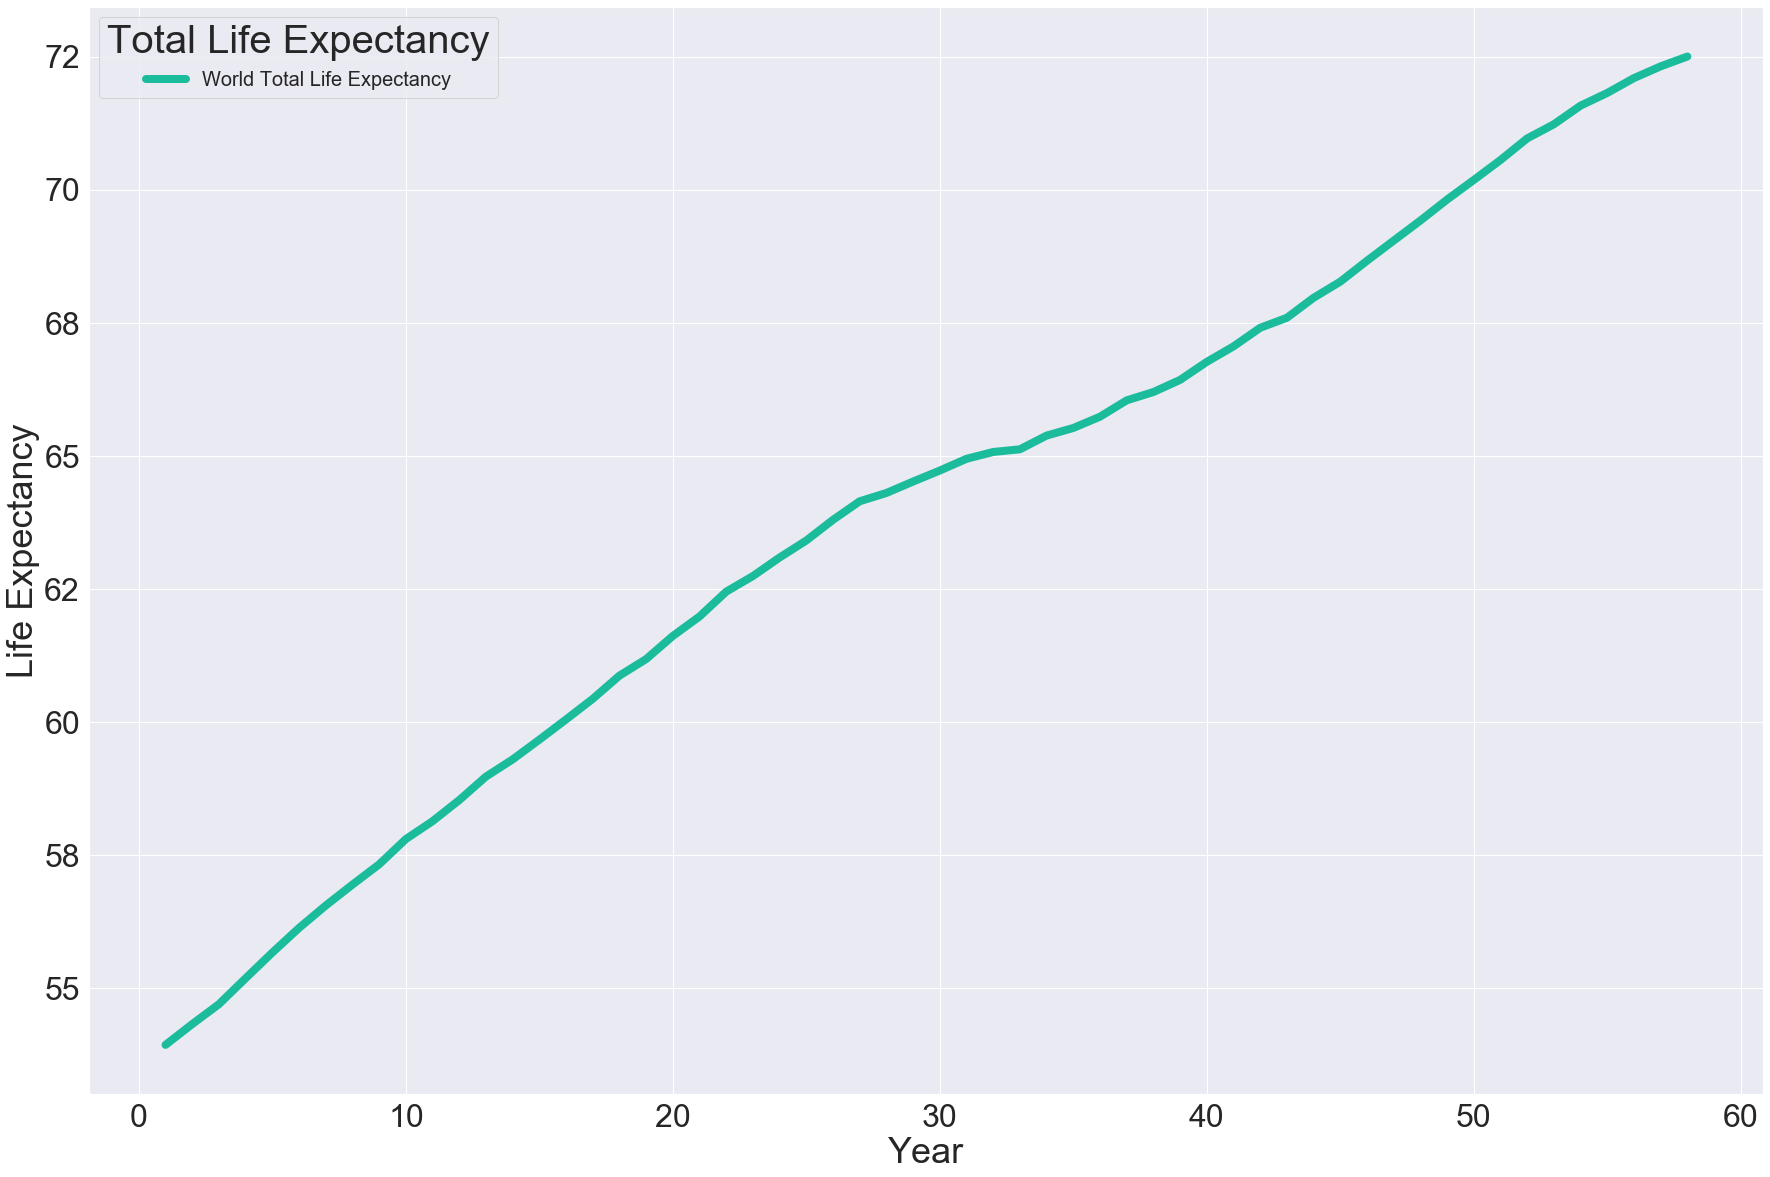

In [92]:
mycolors = ['#1abc9c', '#2ecc71', '#3498db', '#9b59b6', '#34495e', '#16a085', '#27ae60', '#2980b9', '#8e44ad', '#2c3e50', '#f1c40f', '#e67e22', '#e74c3c'] 
# Use seaborn to setup a color map to be used by matplotlib
my_cmap = mpl.colors.ListedColormap(sns.color_palette(mycolors).as_hex())
# Set the size of the figure and get a figure and axis object
fig, ax = plt.subplots(figsize=(30,20))
Final_life.iloc[1:].plot(ax=ax, linewidth=8, cmap=my_cmap)
ax.tick_params(axis = 'both', which = 'major', labelsize=32)
ax.tick_params(axis = 'both', which = 'minor', labelsize=16)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.legend(prop={'size': 20}).set_title("Total Life Expectancy", prop = {'size':40})
ax.set_xlabel('Year', fontsize=36)
ax.set_ylabel('Life Expectancy', fontsize=36)

In [ ]:
mycolors = ['#1abc9c', '#2ecc71', '#3498db', '#9b59b6', '#34495e', '#16a085', '#27ae60', '#2980b9', '#8e44ad', '#2c3e50', '#f1c40f', '#e67e22', '#e74c3c'] 
# Use seaborn to setup a color map to be used by matplotlib
my_cmap = mpl.colors.ListedColormap(sns.color_palette(mycolors).as_hex())
# Set the size of the figure and get a figure and axis object
fig, ax = plt.subplots(figsize=(30,20))
# Plot using the axis ax and colormap my_cmap
wb_fertility0.loc[1960:].plot(ax=ax, linewidth=8, cmap=my_cmap)
# Change options of axes, legend
ax.tick_params(axis = 'both', which = 'major', labelsize=32)
ax.tick_params(axis = 'both', which = 'minor', labelsize=30)
#ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:, .0f}'))
ax.legend(prop={'size': 30}).set_title("Region", prop = {'size':30})
# Label axes
ax.set_xlabel('Year', fontsize=36)
ax.set_ylabel('Fertility Rate', fontsize=36)

In [ ]:

if not os.path.exists(pathout + 'wb_mortality.xls'):
    dataurl2 = "http://api.worldbank.org/v2/en/indicator/SP.DYN.IMRT.IN?downloadformat=excel"
    urllib.request.urlretrieve(dataurl2, pathout + 'wb_mortality.xls')

In [ ]:
wb_mortality = pd.read_excel(pathout + 'wb_mortality.xls', sheet_name="Data", skiprows=3)
wb_mortality = worldbank_fertility[[col for col in worldbank_fertility.columns if str(col).startswith('Unnamed')==False]]
wb_mortality


In [ ]:
if not os.path.exists(pathout + 'wb_life.xls'):
    dataurl2 = "http://api.worldbank.org/v2/en/indicator/SP.DYN.LE00.IN?downloadformat=excel"
    urllib.request.urlretrieve(dataurl2, pathout + 'wb_life.xls')


### 4. Downloads mortality and life expectancy data (across regions and cohorts) from the Human Mortality Database and plots its evolution.

In [172]:
import os

pathout= './data/'
if not os.path.exists(pathout):
    os.mkdir(pathout)
    
pathgraphs = './graphs/'
if not os.path.exists(pathgraphs):
    os.mkdir(pathgraphs)

In [192]:
Mortality = pd.read_csv(pathout + 'stmf.csv')
Mortality

/Users/danielasayago/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#HMD STMF pooled file. Last modified: 2020-06-24 23:47:57 
CountryCode Year Week Sex D0_14              D15_64           D65_74             D75_84            D85p               DTotal             R0_14                  R15_64              R65_74             R75_84              R85p                RTotal                Split SplitSex                                           Forecast        
AUT         2000 1    m   7                  183              212                249               163                814                0.000520377479835266   0.00351264205553729 0.0376068457268229 0.0951375307440371  0.231834312697249   0.0109251576286067    0     0                                                         0        
                      f   2                  104              141                338               468                1053               0.000156223010902756   0.00200229785525484 0.0195527451995018 0.0614422751712247  0.224357017520144   0.0132384791578365    0     0                                                         0        
...                                                                                                                                                                                                                                                                                                                                ...        
USA         2020 23   m   162.611538676371   6136.57708910089 4531.80843090488   5088.751421630829 5058.294335348321  22910.1696616934   0.000276593329427414   0.00300870430948874 0.0154944252576744 0.03658267937557601 0.10844149955059801 0.0073767081486826    1     1                                                         1        
                      f   124.67145071723999 3698.1399215055  3345.0696570108503 4680.3776926592   7648.69846244588   17564.830338306598 0.00022157888751610298 0.00181030381636999 0.010008978734664  0.0263629856628729  0.0925372227203368  0.0054892205670285295 1     1                                                         1        
                      b   287.282989393611   9834.71701060639 7876.87808791573   9769.12911429003  12706.992797794199 40475.0            0.000249689968924181   0.00240903138435009 0.0125690820692141 0.0308526059149514  0.0982747066359367  0.00641887580941385   1     0                                                         1        

[60571 rows x 1 columns]

In [193]:
Mortality = Mortality.reset_index()
new_header = Mortality.iloc[0] 
Mortality.columns = new_header 

Mortality

,CountryCode,Year,Week,Sex,D0_14,D15_64,D65_74,D75_84,D85p,DTotal,R0_14,R15_64,R65_74,R75_84,R85p,RTotal,Split,SplitSex,Forecast
0,CountryCode,Year,Week,Sex,D0_14,D15_64,D65_74,D75_84,D85p,DTotal,R0_14,R15_64,R65_74,R75_84,R85p,RTotal,Split,SplitSex,Forecast
1,AUT,2000,1,m,7,183,212,249,163,814,0.000520377479835266,0.00351264205553729,0.0376068457268229,0.0951375307440371,0.231834312697249,0.0109251576286067,0,0,0
2,AUT,2000,1,f,2,104,141,338,468,1053,0.000156223010902756,0.00200229785525484,0.0195527451995018,0.0614422751712247,0.224357017520144,0.0132384791578365,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60568,USA,2020,23,m,162.612,6136.58,4531.81,5088.75,5058.29,22910.2,0.000276593,0.0030087,0.0154944,0.0365827,0.108441,0.00737671,1,1,1
60569,USA,2020,23,f,124.671,3698.14,3345.07,4680.38,7648.7,17564.8,0.000221579,0.0018103,0.010009,0.026363,0.0925372,0.00548922,1,1,1
60570,USA,2020,23,b,287.283,9834.72,7876.88,9769.13,12707,40475,0.00024969,0.00240903,0.0125691,0.0308526,0.0982747,0.00641888,1,0,1


In [194]:
Mortalityb=Mortality.loc[Mortality.Sex=='b']
Mortalitym=Mortality.loc[Mortality.Sex=='m']
Mortalityf=Mortality.loc[Mortality.Sex=='f']
graphb = Mortalityb[['Year','RTotal']]
graphb = graphb.apply(pd.to_numeric)

graphm = Mortalitym[['Year','RTotal']]
graphm = graphm.apply(pd.to_numeric)

graphf = Mortalityf[['Year','RTotal']]
graphf = graphf.apply(pd.to_numeric)
graphf

,Year,RTotal
2,2000,0.013238
5,2000,0.013352
8,2000,0.014345
...,...,...
60563,2020,0.007364
60566,2020,0.006721
60569,2020,0.005489


In [197]:
meanb =graphb.groupby(['Year']).mean()
meanf =graphf.groupby(['Year']).mean()
meanm =graphm.groupby(['Year']).mean()

meanb.rename(columns={'RTotal':'Both'}, inplace=True)
meanf.rename(columns={'RTotal':'Female'}, inplace=True)
meanm.rename(columns={'RTotal':'Male'}, inplace=True)
TOT=meanb.merge(meanm, on='Year')
TOT=TOT.merge(meanf, on = 'Year')
TOT

,Both,Male,Female
Year,,,
1990,0.010013,0.010312,0.009731
1991,0.009802,0.010071,0.009548
1992,0.009816,0.010082,0.009565
...,...,...,...
2018,0.009890,0.010125,0.009668
2019,0.009773,0.010023,0.009535
2020,0.010801,0.011068,0.010549


In [200]:
Mortality.rename(columns={'CountryCode':'countrycode'}, inplace=True)
Mortality


,countrycode,Year,Week,Sex,D0_14,D15_64,D65_74,D75_84,D85p,DTotal,R0_14,R15_64,R65_74,R75_84,R85p,RTotal,Split,SplitSex,Forecast
0,CountryCode,Year,Week,Sex,D0_14,D15_64,D65_74,D75_84,D85p,DTotal,R0_14,R15_64,R65_74,R75_84,R85p,RTotal,Split,SplitSex,Forecast
1,AUT,2000,1,m,7,183,212,249,163,814,0.000520377479835266,0.00351264205553729,0.0376068457268229,0.0951375307440371,0.231834312697249,0.0109251576286067,0,0,0
2,AUT,2000,1,f,2,104,141,338,468,1053,0.000156223010902756,0.00200229785525484,0.0195527451995018,0.0614422751712247,0.224357017520144,0.0132384791578365,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60568,USA,2020,23,m,162.612,6136.58,4531.81,5088.75,5058.29,22910.2,0.000276593,0.0030087,0.0154944,0.0365827,0.108441,0.00737671,1,1,1
60569,USA,2020,23,f,124.671,3698.14,3345.07,4680.38,7648.7,17564.8,0.000221579,0.0018103,0.010009,0.026363,0.0925372,0.00548922,1,1,1
60570,USA,2020,23,b,287.283,9834.72,7876.88,9769.13,12707,40475,0.00024969,0.00240903,0.0125691,0.0308526,0.0982747,0.00641888,1,0,1


In [201]:
Mortalitycohort = Mortality
Mortalitycohort


,countrycode,Year,Week,Sex,D0_14,D15_64,D65_74,D75_84,D85p,DTotal,R0_14,R15_64,R65_74,R75_84,R85p,RTotal,Split,SplitSex,Forecast
0,CountryCode,Year,Week,Sex,D0_14,D15_64,D65_74,D75_84,D85p,DTotal,R0_14,R15_64,R65_74,R75_84,R85p,RTotal,Split,SplitSex,Forecast
1,AUT,2000,1,m,7,183,212,249,163,814,0.000520377479835266,0.00351264205553729,0.0376068457268229,0.0951375307440371,0.231834312697249,0.0109251576286067,0,0,0
2,AUT,2000,1,f,2,104,141,338,468,1053,0.000156223010902756,0.00200229785525484,0.0195527451995018,0.0614422751712247,0.224357017520144,0.0132384791578365,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60568,USA,2020,23,m,162.612,6136.58,4531.81,5088.75,5058.29,22910.2,0.000276593,0.0030087,0.0154944,0.0365827,0.108441,0.00737671,1,1,1
60569,USA,2020,23,f,124.671,3698.14,3345.07,4680.38,7648.7,17564.8,0.000221579,0.0018103,0.010009,0.026363,0.0925372,0.00548922,1,1,1
60570,USA,2020,23,b,287.283,9834.72,7876.88,9769.13,12707,40475,0.00024969,0.00240903,0.0125691,0.0308526,0.0982747,0.00641888,1,0,1


In [202]:
Mortalitycohort = Mortalitycohort.loc[Mortalitycohort.Sex=='b']
Mortalitycohort

,countrycode,Year,Week,Sex,D0_14,D15_64,D65_74,D75_84,D85p,DTotal,R0_14,R15_64,R65_74,R75_84,R85p,RTotal,Split,SplitSex,Forecast
3,AUT,2000,1,b,9,287,353,587,631,1867,0.000342805103843661,0.00275861110478271,0.0274739491005247,0.072305225985972,0.226241960476464,0.0121196153840422,0,0,0
6,AUT,2000,2,b,10,304,321,571,696,1902,0.00038089455982629,0.00292201315628552,0.0249833928081258,0.0703343850732369,0.249547392221266,0.0123468176006686,0,0,0
9,AUT,2000,3,b,13,342,346,573,753,2027,0.000495162927774176,0.00328726480082121,0.0269291399115624,0.0705807401873288,0.269984463135939,0.01315825408862,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60564,USA,2020,21,b,447.465,13474.5,10477.7,12994.7,16902.6,54297,0.000388911,0.00330061,0.0167192,0.0410396,0.130723,0.00861089,1,0,1
60567,USA,2020,22,b,378.691,12108.3,9621.04,11932.3,15520.7,49561,0.000329137,0.00296595,0.0153522,0.0376842,0.120035,0.00785981,1,0,1
60570,USA,2020,23,b,287.283,9834.72,7876.88,9769.13,12707,40475,0.00024969,0.00240903,0.0125691,0.0308526,0.0982747,0.00641888,1,0,1


In [203]:
Mortailyw =Mortalitycohort.drop(columns=['countrycode','Sex','D0_14','D15_64','D65_74','D75_84','D85p','DTotal',
                                        'RTotal','Split','SplitSex','Forecast' ,'Week']) 
Mortailyw = Mortailyw.apply(pd.to_numeric)
Mortailyw

,Year,R0_14,R15_64,R65_74,R75_84,R85p
3,2000,0.000343,0.002759,0.027474,0.072305,0.226242
6,2000,0.000381,0.002922,0.024983,0.070334,0.249547
9,2000,0.000495,0.003287,0.026929,0.070581,0.269984
...,...,...,...,...,...,...
60564,2020,0.000389,0.003301,0.016719,0.041040,0.130723
60567,2020,0.000329,0.002966,0.015352,0.037684,0.120035
60570,2020,0.000250,0.002409,0.012569,0.030853,0.098275


In [204]:
Mortailyw = Mortailyw.pivot_table(index='Year', aggfunc='sum')
Mortailyw

,R0_14,R15_64,R65_74,R75_84,R85p
Year,,,,,
1990,0.030611,0.187497,1.447023,3.820833,9.751712
1991,0.030566,0.182541,1.376979,3.725699,9.429519
1992,0.027490,0.176532,1.369960,3.748045,9.345923
...,...,...,...,...,...
2018,0.348947,2.871381,19.311762,52.103905,174.130720
2019,0.338562,2.809790,18.894154,50.172773,170.312012
2020,0.134958,1.229819,8.482376,23.176561,79.583181


Text(0, 0.5, 'Death rate by cohort')

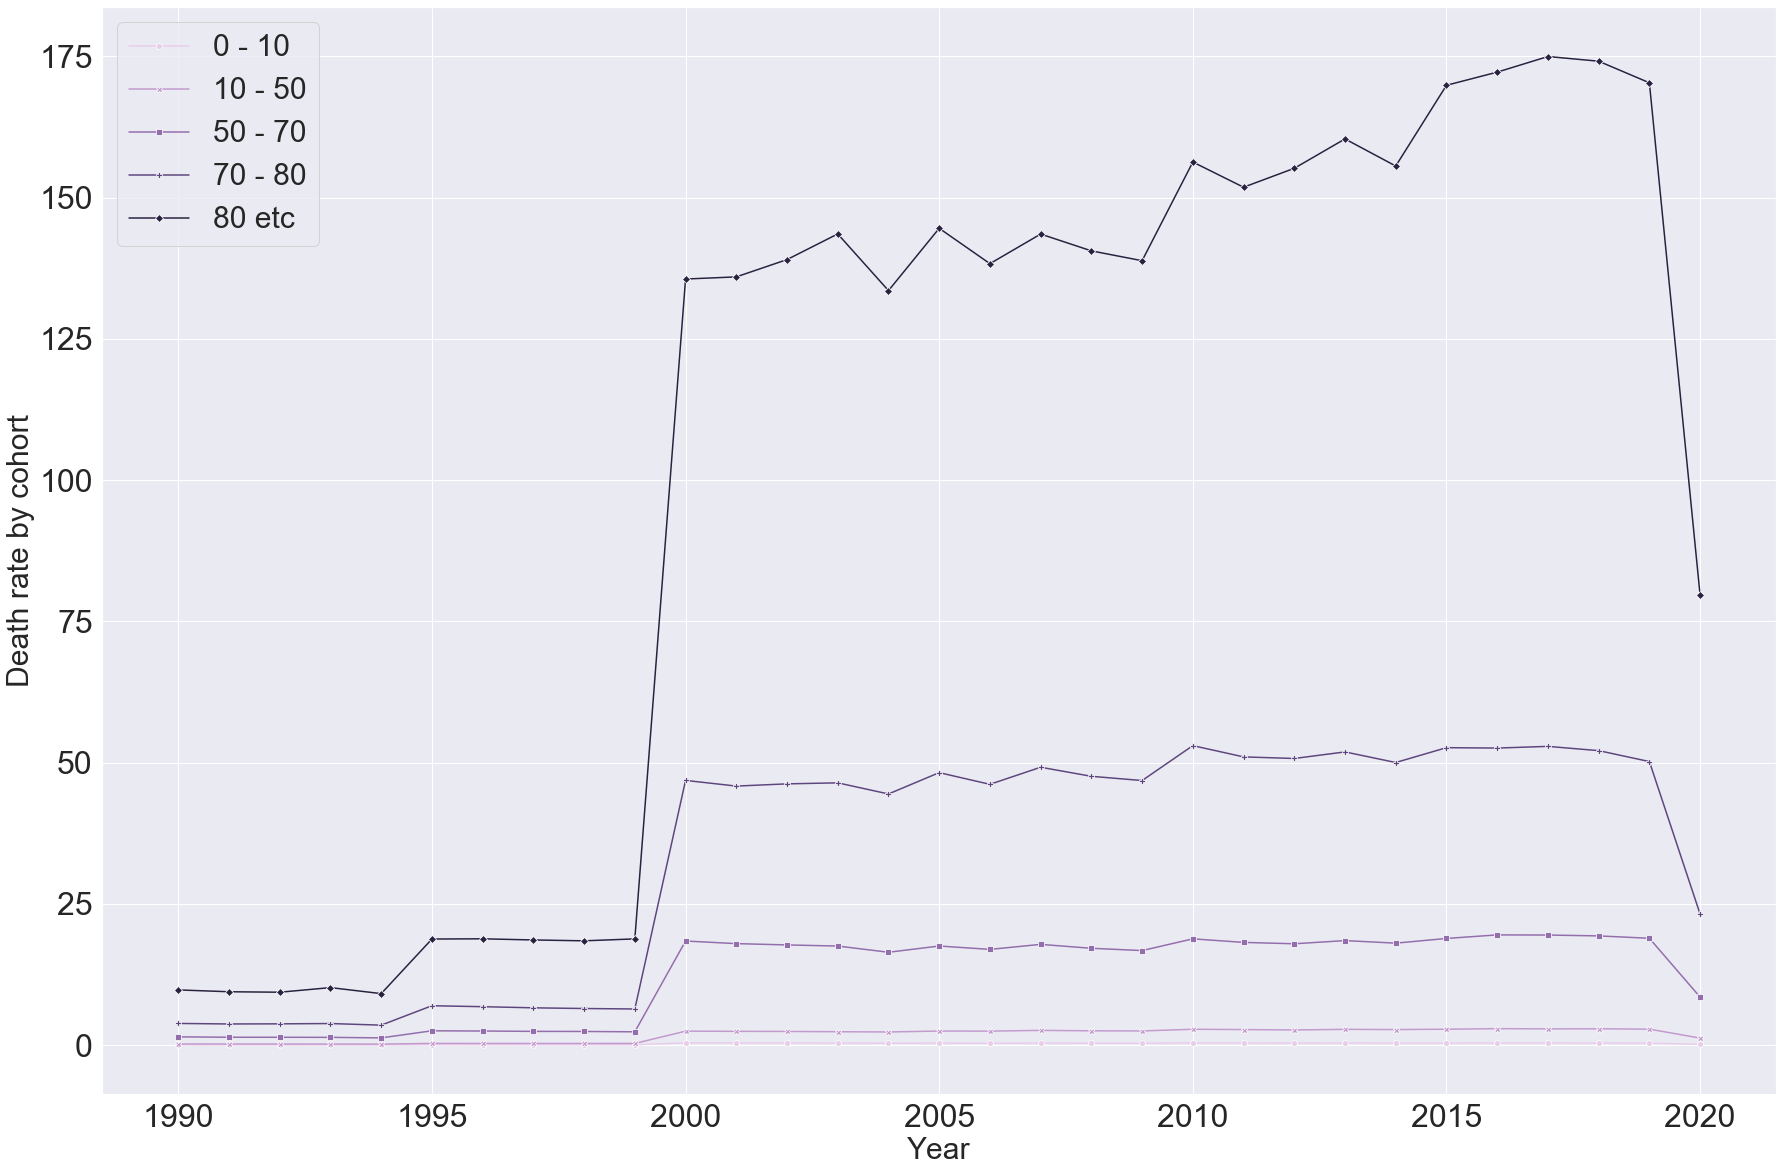

In [205]:
# Select some colors
mycolors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
# Use seaborn to setup a color map to be used by matplotlib
my_cmap = mpl.colors.ListedColormap(sns.color_palette(mycolors).as_hex())
# Set the size of the figure and get a figure and axis object
fig, ax = plt.subplots(figsize=(30,20))
# Plot using the axis ax and colormap my_cmap
sns.lineplot(data=Mortailyw , palette="ch:66.,.16", hue="event", style="event", dashes=False, markers=True)
# Change options of axes, legend
ax.tick_params(axis = 'both', which = 'major', labelsize=32)
ax.tick_params(axis = 'both', which = 'minor', labelsize=16)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.legend(prop={'size': 40}).set_title("Region", prop = {'size':40})
# Label axes
plt.legend(['0 - 10','10 - 50','50 - 70','70 - 80', '80 etc'],fontsize=30)
ax.set_xlabel('Year', fontsize=30)
ax.set_ylabel('Death rate by cohort', fontsize=30)

Text(0, 0.5, 'Death rate by sex')

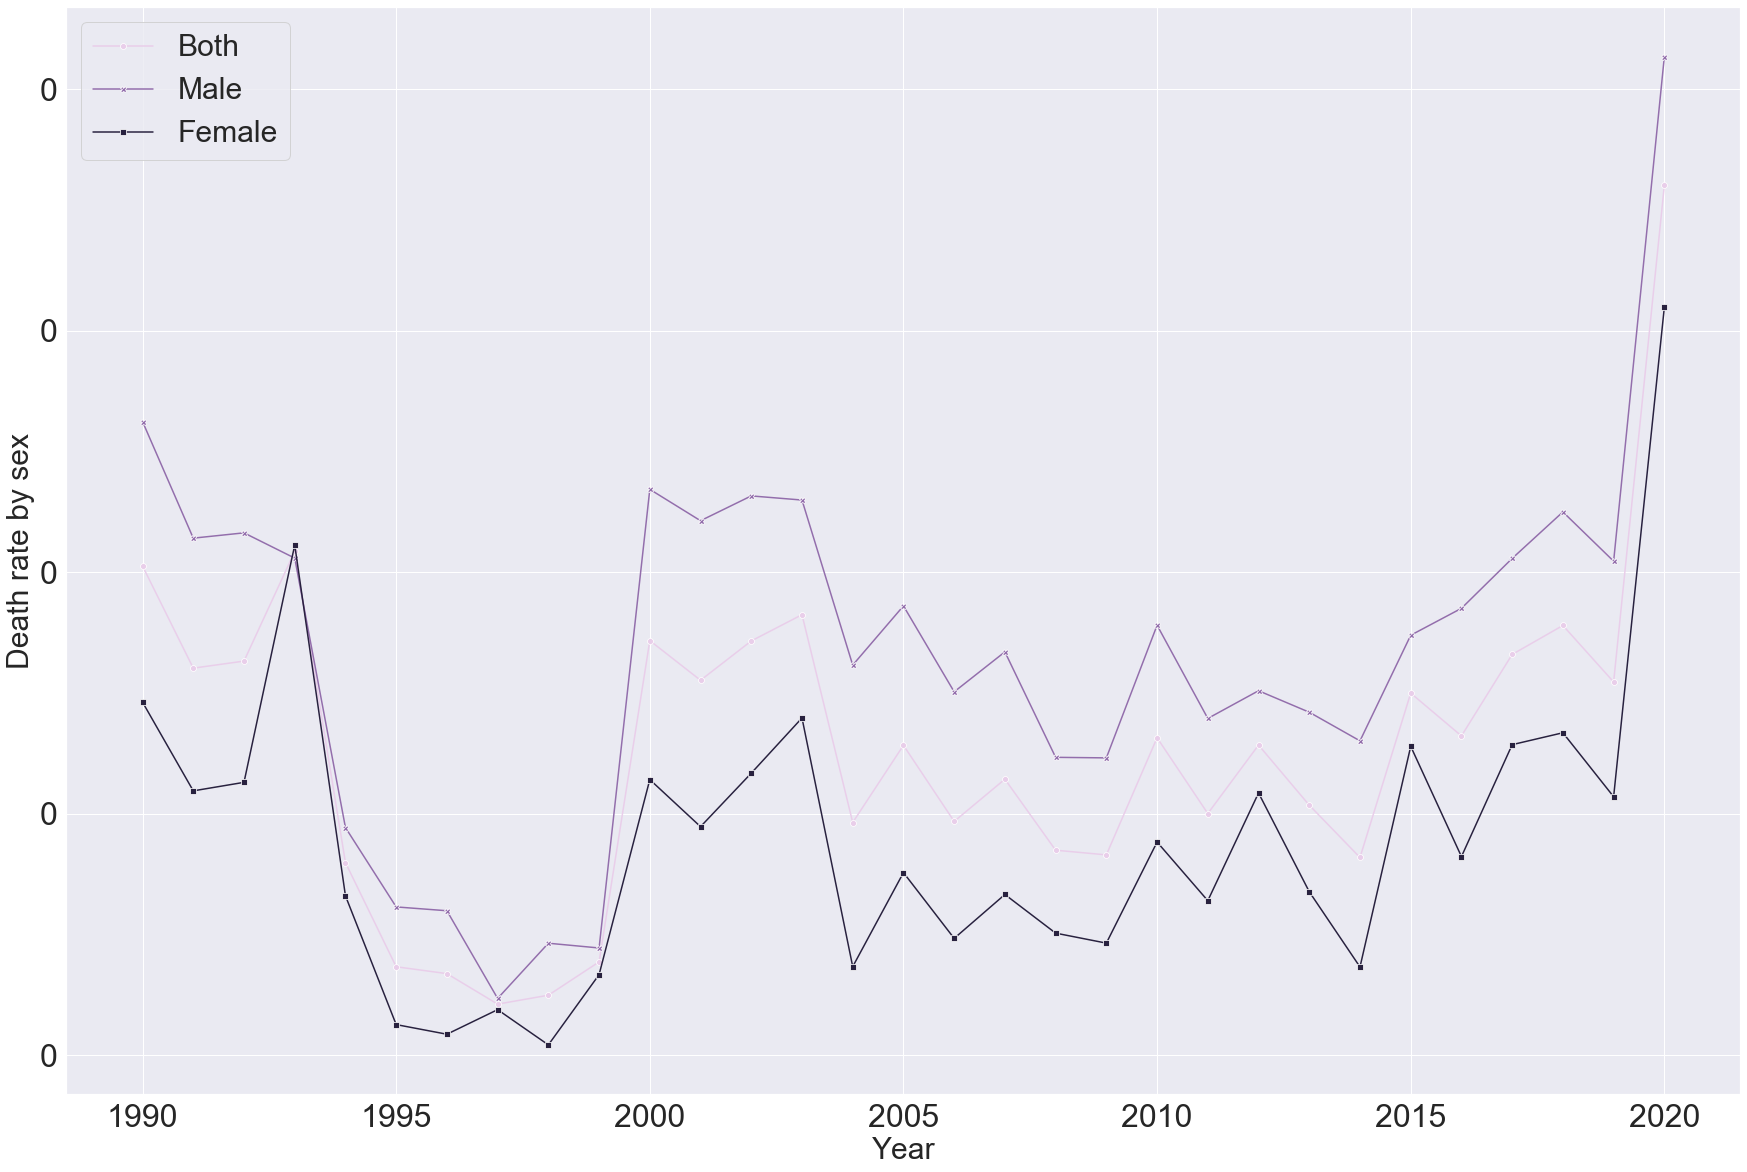

In [206]:
# Select some colors
mycolors = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
# Use seaborn to setup a color map to be used by matplotlib
my_cmap = mpl.colors.ListedColormap(sns.color_palette(mycolors).as_hex())
# Set the size of the figure and get a figure and axis object
fig, ax = plt.subplots(figsize=(30,20))
# Plot using the axis ax and colormap my_cmap
sns.lineplot(data=t , palette="ch:66.,.16", hue="event", style="event", dashes=False, markers=True)
# Change options of axes, legend
ax.tick_params(axis = 'both', which = 'major', labelsize=32)
ax.tick_params(axis = 'both', which = 'minor', labelsize=16)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.legend(prop={'size': 40}).set_title("Region", prop = {'size':40})
# Label axes
plt.legend(['Both','Male','Female'], fontsize=30)
ax.set_xlabel('Year', fontsize=30)
ax.set_ylabel('Death rate by sex', fontsize=30)